# dtlpy.datasets


In this Jupyter notebook, we will describe how to use each method in the `dtlpy.datasets`. We will describe each function in-depth, so you can know everything about each function by the end of this section.

--------------------------

[dl.datasets.create()](#create) | [dl.datasets.get()](#get) | [dl.datasets.clone()](#clone) | [dl.datasets.delete()](#delete) | [dl.datasets.directory_tree()](#directory_tree) | [dl.datasets.download_annotations()](#download_annotations) | [dl.datasets.list()](#list) | [dl.datasets.merge()](#merge) | [dl.datasets.open_in_web()](#open_in_web) | [dl.datasets.set_readonly()](#set_readonly) | [dl.datasets.update()](#update) | [dl.datasets.upload_annotations()](#upload_annotations)

---------------------------

## Import dtlpy and log in to Dataloop

In [8]:
import dtlpy as dl
dl.setenv('prod')
#Logging in to Dataloop (checks if token expired ~24h expiration time for token)
if dl.token_expired():
   dl.login()
#you can also use the simple login: 
#dl.login()

## Select Project
To work with Datasets, you must first select a Project to which you will add your Dataset. For that purpose, let's create a new Project. You can do that using:
```python
dl.projects.create(project_name='Dataset_Project')
proj = dl.projects.get(project_name='Dataset_Project')
```
And you can then print the details of the new Project you just created:
```python
print(proj)
```
The output should look like this:
```python
Project(created_at=1683805649832, creator='email@gmail.com', id='b9ee960e-9626-46c7-92d9-95c84d6a2730', name='Dataset_Project', feature_constraints=[{'name': 'downloadJsons', 'quota': 1, 'title': 'Download Annotation as Json'}, {'name': 'createGPUService', 'quota': 1, 'title': 'Create GPU service'}, {'name': 'createIntegration', 'quota': 1, 'title': 'Create Integrations'}, {'name': 'createDriver', 'quota': 1, 'title': 'Create Driver'}])
```

In [2]:
dl.projects.create(project_name='Dataset_Project') # run only once - or you'll get error (harmless error, but it looks ugly)

In [9]:
proj = dl.projects.get(project_name='Dataset_Project')

In [19]:
print(proj) 

Project(created_at=1683805649832, creator='myfuncont@gmail.com', id='b9ee960e-9626-46c7-92d9-95c84d6a2730', name='Dataset_Project', feature_constraints=[{'name': 'downloadJsons', 'quota': 1, 'title': 'Download Annotation as Json'}, {'name': 'createGPUService', 'quota': 1, 'title': 'Create GPU service'}, {'name': 'createIntegration', 'quota': 1, 'title': 'Create Integrations'}, {'name': 'createDriver', 'quota': 1, 'title': 'Create Driver'}])


## <a name="create"></a> dl.datasets.create()
The `dl.datasets.create()` method allows you to create a new Dataset in the Project that  you are currently working on.

You can see all of the details of this function, below.

### create()

**Definition:**  `create(dataset_name: str, labels=None, attributes=None, ontology_ids=None, driver: entities.Driver=None, driver_id: str=None, checkout: bool=False, expiration_options: entities.ExpirationOptions=None, index_driver: entities.IndexDriver=None, recipe_id: str=None) -> entities.Dataset`

***Creates a new Dataset in the current Project.***

**Prerequisites:** You must be in the role of an Owner or Developer (engineer).

**param str dataset_name**
- The Name of the Dataset

**param list labels**
- Dictionary of {tag: color} or list of Label entities

**param list attributes**
- The Dataset's Ontology's attributes

**param list ontology_ids**
- (optional) The Dataset's Ontology

**param dtlpy.entities.driver.Driver driver**
- (optional) Storage driver, driver object or driver name

**param str driver_id**
- (optional) The Driver's ID

**param bool checkout**
- Sets the Dataset as a default Dataset object (cookies)

**param ExpirationOptions expiration_options**
- dl.ExpirationOptions object that contain definitions for the Dataset like MaxItemDays

**param str index_driver**
- dl.IndexDriver, Dataset driver's version

**param str recipe_id**
- (optional) The Recipe's ID

**return**
- Dataset object

**rtype**
- dtlpy.entities.dataset.Dataset

**Simple Creation Example:**
```python
project.datasets.create(dataset_name='dataset_name')
```
We will create a new dataset called `Test_Dataset` using the code above:
```python
dl.datasets.create(dataset_name='Test_Dataset')
```
Once you run that command, you should see an output that is similar to this:
```python
ataset(id='645cee1b05c36859784c0b37', url='https://gate.dataloop.ai/api/v1/datasets/645cee1b05c36859784c0b37', name='Test_Dataset', creator='email@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-11T13:31:07.545Z')
```

In [21]:
dl.datasets.create(dataset_name='Test_Dataset') #run only once, or you'll get a (harmless) error

Dataset(id='645e54554da72568414553b7', url='https://gate.dataloop.ai/api/v1/datasets/645e54554da72568414553b7', name='Test_Dataset', creator='myfuncont@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-12T14:59:33.939Z')

## <a name="get"></a> dl.datasets.get()
The `dl.datasets.get()` method allows you to retrieve the Dataset from Datalopp's platform, inside your working code, or inside of a variable.

You can see all of the details about this method below.

### get()

**Definition:** `get(dataset_name: str=None, dataset_id: str=None, checkout: bool=False, fetch: bool=None) -> entities.Dataset`

***Retrieves a Dataset by Name or ID.***

**Prerequisites:** You must be an Owner or Developer to use this method. **You must provide at least ONE of the following params: `dataset_id` or `dataset_name`.**

**param str dataset_name**
- (optional) search by Name

**param str dataset_id**
- (optional) search by Id

**param bool checkout**
- Sets the Dataset as a default Dataset object (cookies)

**param bool fetch**
- (optional) Fetch entity from platform (True); bydefault taken from cookie

**return**
- Dataset object

**rtype**
- dtlpy.entities.dataset.Dataset

**Example:**
```python
dataset = dl.datasets.get(dataset_id='dataset_id')
#or
dataset= dl.dataset.get(dataset_name='dataset_name')

```
**Note:** We can also get the dataset directly from the Project entity (`proj`) that we created above (in this case, you need to `get()` the Project in a variable first). The code would look like this:
```python
dataset = proj.datasets.get(dataset_id='dataset_id')
#or
dataset= proj.dataset.get(dataset_name='dataset_name')
```


We will create a variable called `d_set` to avoid any confusion, and we will retrieve the Dataset we created, called `Test_Dataset` in it, using:
```python
d_set = dl.datasets.get(dataset_name='Test_Dataset')
```
We can then print the details of the `d_set` variable, to see that we retrieved the Dataset we wanted to:
```python
print(d_set)
```
The output should look like this:
```python
Dataset(id='645cee1b05c36859784c0b37', url='https://gate.dataloop.ai/api/v1/datasets/645cee1b05c36859784c0b37', name='Test_Dataset', creator='email@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-11T13:31:07.545Z')
```

In [10]:
d_set = dl.datasets.get(dataset_name='Test_Dataset')

print(d_set)

## <a name="clone"></a> dl.datasets.clone()
The `dl.datasets.get()` method allows you to clone a Dataset, so you can keep your original untouched and work on the clone without fear of breaking anything. This can also be used for Versioning, which allows you to make changes and create checkpoints for your Dataset.

**Important!** The new Dataset will have the same Recipe and Ontology as the Original. [Read more about Recipes and Ontology](https://dataloop.ai/docs/taxonomy-overview), since they are critical building blocks of Datasets.

You can find all the details about this method below.

### clone()

**Definition:** `clone(dataset_id: str, clone_name: str, filters: entities.Filters=None, with_items_annotations: bool=True, with_metadata: bool=True, with_task_annotations_status: bool=True)`

***Clones an existing Dataset.*** [Read more about cloning datatsets here](https://dataloop.ai/docs/clone-merge-dataset). 

**Prerequisites:** You must have the role of  Owner or Developer (engineer).

**param str dataset_id**
id of the dataset you wish to clone

**param str clone_name**
new dataset name

**param dtlpy.entities.filters.Filters filters**
Filters entity or a query dict

**param bool with_items_annotations**
true to clone with items annotations

**param bool with_metadata**
true to clone with metadata

**param bool with_task_annotations_status**
true to clone with task annotations' status

**return**
dataset object

**rtype**
dtlpy.entities.dataset.Dataset

**Example:**
```python
dataset_clone = proj.datasets.clone(dataset_id='dataset_id',
                      clone_name='dataset_clone_name',
                      with_metadata=True,
                      with_items_annotations=False,
                      with_task_annotations_status=False)
```
If we run that code on the existing Dataset we created `Test_Dataset`(you cane find the ID by running `d_set`), it will look like this:
```python

dataset_clone = proj.datasets.clone(dataset_id='645cee1b05c36859784c0b37',
                      clone_name='Test_Dataset_Clone',
                      with_metadata=True,
                      with_items_annotations=False,#True if you want
                      with_task_annotations_status=False)#True if you want
```
You should get a progress bar as an output. Wait untill it is completed for the clone to be created successfully:
```python
Command Progress: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 288.04it/s]
```
After that, you can check if the Clone was created, by printing the `dataset_clone` variable which should contain the cloned Dataset Object:
```python
print(dataset_clone) #print the cloned Dataset's details
```
The printed details should look similar to this:

```python
Dataset(id='645e3b5597a22fe0971aa231', url='https://gate.dataloop.ai/api/v1/datasets/645e3b5597a22fe0971aa231', name='Test_Dataset_Clone', creator='email@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-12T13:12:53.211Z')
```

In [23]:
dataset_clone = proj.datasets.clone(dataset_id='645cee1b05c36859784c0b37',
                      clone_name='Test_Dataset_Clone',
                      with_metadata=True,
                      with_items_annotations=False,#True if you want
                      with_task_annotations_status=False)#True if you want

Command Progress: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 311.95it/s]

[2023-05-12 18:00:12][WAR][dtlpy:v1.76.17][entities.dataset:145] Dataset has been fetched from a project that is not in it projects list


In [24]:
print(dataset_clone)

Dataset(id='645e547c1f14b2609fe1f989', url='https://gate.dataloop.ai/api/v1/datasets/645e547c1f14b2609fe1f989', name='Test_Dataset_Clone', creator='myfuncont@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-12T15:00:12.121Z')


----------------------------------------------
## <a name="delete"></a> dl.datasets.delete()
The `dl.datasets.delete()` method allows you to permanently delete a Dataset from the Dataloop Platform. Make sure that you really want to remove the Dataset and all of its contents, as **the removal is permanent**.

All of of the details about this method can be seen below.

### delete()

**Definition:** `delete(dataset_name: str=None, dataset_id: str=None, sure: bool=False, really: bool=False)`

***Deletes a Dataset forever!***

**Prerequisites:** You must be an Owner to use this method.


**param str dataset_name**
- (optional) Search by name

**param str dataset_id**
- (optional) Search by ID

**param bool sure**
- Are you sure you want to delete?

**param bool really**
- Really really sure that you are sure?

**return**
- True is success; are you sure you want success?

**rtype**
- bool

**Example:**
```python
proj.datasets.delete(dataset_id='dataset_id', sure=True, really=True) # Are you sure you are sure?
# or you can use with both name and id
# dl.datasets.delete(dataset_name='Test_Dataset_Clone', sure=True, really=True) 
```
For the purpose of showing how the `delete()` method works, we will delete the clone Dataset we created [above](#clone), called `Test_Dataset_Clone`:
```python
dl.datasets.delete(dataset_name='Test_Dataset_Clone', sure=True, really=True)
# Or
dl.datasets.delete(dataset_id='645e547c1f14b2609fe1f989', sure=True, really=True)
```
To this, you should get a simple output:
```python
True
```
**Note:** If the Dataset you want to delete is not in the current project you are working on, you **need** to use the `dl.datasets.delete(dataset_name='Test_Dataset_Clone', sure=True, really=True)`, as this option will look thorugh all of the Datasets you have in the current active Organization, on all Projects. 
***Important!***   We highly recommend that you delete a Dataset using its `ID`, as each ID is unique. This will always make sure that you delete the right ID. You can find the ID of all Datasets in the [WebUI version of Dataloop](https://dataloop.ai/) or by using `dl.datasets.list()` - in the current active Project. Just to make sure you know, an example of the command to delete by ID can be seen below:
```python
dl.datasets.delete(dataset_id='645e547c1f14b2609fe1f989', sure=True, really=True)
```

In [17]:
dl.datasets.delete(dataset_id='645e547c1f14b2609fe1f989', sure=True, really=True)
#If all goes right you should get a simple `True` boolean Output

[2023-05-16 20:17:00][WAR][dtlpy:v1.76.17][entities.dataset:145] Dataset has been fetched from a project that is not in it projects list


True

In [27]:
dl.datasets.list()

[Dataset(id='645cd5d2702bd26db5ff8d5e', url='https://gate.dataloop.ai/api/v1/datasets/645cd5d2702bd26db5ff8d5e', name='Binaries', creator='myfuncont@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-11T11:47:30.314Z'),
 Dataset(id='645e54554da72568414553b7', url='https://gate.dataloop.ai/api/v1/datasets/645e54554da72568414553b7', name='Test_Dataset', creator='myfuncont@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-12T14:59:33.939Z')]

## <a name="directory_tree"></a> dl.datasets.directory_tree()
The `dl.datasets.directory_tree()` method allows you to find out what your Dataset's location is in Dataloop's platform, and other details regarding your Dataset.

You can find all the details about this method below.


### directory_tree()
**Definition:** `directory_tree(dataset: entities.Dataset=None, dataset_name: str=None, dataset_id: str=None)`

***Gets a Dataset's directory tree.***

**Prerequisites:** You must be an Owner or Developer(engineer) to use this method. 

**You must provide at least ONE of the following params: dataset, dataset_name, dataset_id.**

**param dtlpy.entities.dataset.Dataset dataset**
- Dataset Object

**param str dataset_name**
- The Name of the Dataset

**param str dataset_id**
- The Id of the Dataset

**return**
- DirectoryTree

**Example:**
```python
directory_tree = dl.datasets.directory_tree(dataset='dataset_entity')
```
Let's run that example of the `Test_Dataset` we created:
```python
directory_tree = proj.datasets.directory_tree(dataset_name='Test_Dataset')
directory_tree.tree

```
The output of the `directory_tree.tree` should look similar to this:
```python
{'value': {'id': '645e54554da725a6ed4553b9',
  'datasetId': '645e54554da72568414553b7',
  'url': 'https://gate.dataloop.ai/api/v1/items/645e54554da725a6ed4553b9',
  'dataset': 'https://gate.dataloop.ai/api/v1/datasets/645e54554da72568414553b7',
  'createdAt': '2023-05-12T14:59:33.000Z',
  'dir': '/',
  'filename': '/',
  'type': 'dir',
  'hidden': False,
  'metadata': {},
  'name': '',
  'creator': 'email@gmail.com',
  'items': 'https://gate.dataloop.ai/api/v1/datasets/645e54554da72568414553b7/items/645e54554da725a6ed4553b9/items',
  'export': {'zip': 'https://gate.dataloop.ai/api/v1/datasets/645e54554da72568414553b7/annotations/zip?directory=/',
   'json': 'https://gate.dataloop.ai/api/v1/datasets/645e54554da72568414553b7/annotations/json?directory=/'}},
 'children': []}
```

In [36]:
directory_tree = proj.datasets.directory_tree(dataset_name='Test_Dataset')

In [35]:
directory_tree.tree

{'value': {'id': '645e54554da725a6ed4553b9',
  'datasetId': '645e54554da72568414553b7',
  'url': 'https://gate.dataloop.ai/api/v1/items/645e54554da725a6ed4553b9',
  'dataset': 'https://gate.dataloop.ai/api/v1/datasets/645e54554da72568414553b7',
  'createdAt': '2023-05-12T14:59:33.000Z',
  'dir': '/',
  'filename': '/',
  'type': 'dir',
  'hidden': False,
  'metadata': {},
  'name': '',
  'creator': 'myfuncont@gmail.com',
  'items': 'https://gate.dataloop.ai/api/v1/datasets/645e54554da72568414553b7/items/645e54554da725a6ed4553b9/items',
  'export': {'zip': 'https://gate.dataloop.ai/api/v1/datasets/645e54554da72568414553b7/annotations/zip?directory=/',
   'json': 'https://gate.dataloop.ai/api/v1/datasets/645e54554da72568414553b7/annotations/json?directory=/'}},
 'children': []}

## <a name="download_annotations"></a> dl.datasets.download_annotations()
The `dl.datasets.download_annotations()` method allows you to download the Annotations and Items from a Dataset, depending on the Filter you are using. You can download as a mask, instance or an image mask of the Item.

You can see all of the details about this method below.

### download_annotations()

Definition: ` download_annotations(dataset: entities.Dataset, local_path: str=None, filters: entities.Filters=None, annotation_options: entities.ViewAnnotationOptions=None, annotation_filters: entities.Filters=None, overwrite: bool=False, thickness: int=1, with_text: bool=False, remote_path: str=None, include_annotations_in_output: bool=True, export_png_files: bool=False, filter_output_annotations: bool=False, alpha: float=None, export_version=entities.ExportVersion.V1) -> str`

***Download a Dataset's Annotations and/or Items by filters. You may filter the Dataset both for Items and for Annotations, and download them. Optionally you can download Annotations as: mask, instance, image mask of the Item.***



**Prerequisites:** You must be in the role of Owner or Developer(engineer).

**param dtlpy.entities.dataset.Dataset dataset**
- Dataset object

**param str local_path**
- Local folder save location (and/or saved filename)  

**param dtlpy.entities.filters.Filters filters**
- Filters entity or a dictionary containing filters parameters

**param list annotation_options**
- Type of download annotations: list(dl.ViewAnnotationOptions)

**param dtlpy.entities.filters.Filters annotation_filters**
- Filters entity to filter annotations for download

**param bool overwrite**
- (optional) By default = False so it doesn't overwrite the existing files

**param int thickness**
- (optional) - line thickness, if -1 annotation will be filled, default =1

**param bool with_text**
optional - add text to annotations, default = False

**param str remote_path**
DEPRECATED and ignored

**param bool include_annotations_in_output**
default - False , if export should contain annotations

**param bool export_png_files**
default - if True, semantic annotations should be exported as png files

**param bool filter_output_annotations**
default - False, given an export by filter - determine if to filter out annotations

**param float alpha**
opacity value [0 1], default 1

**param str export_version**
exported items will have original extension in filename, V1 - no original extension in filenames

**return**
local_path of the directory where all the downloaded Item were placed

**rtype**
str

Example:
```python
            #dl. or proj. (the project object/variable's name)
file_path = dl.datasets.download_annotations(dataset='dataset_entity',
                                     local_path='C:\\Users\\User\\Desktop\\dataloop_code_docs',
                                     #(optional)annotation_options=dl.ViewAnnotationOptions,
                                     overwrite=False,
                                     thickness=1,
                                     with_text=False,
                                     alpha=1
                                     )
```
In our case, a working example would be:
```python
# the dataset is d_set, or the variable in which you got the dataset object
#Optionally, you can do
#d_set = dl.datasets.get(dataset_name='Test_Dataset') #or your dataset's name/id
file_path = dl.datasets.download_annotations(dataset=d_set,
                                     local_path='local_path',
                                     #(optional)annotation_options=dl.ViewAnnotationOptions,
                                     overwrite=False,
                                     thickness=1,
                                     with_text=False,
                                     alpha=1
                                     )
```
And you'll get as an output a command progress bar and a download progress bar (wait for them to finish):
```python
Command Progress: 100%|██████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 53.51it/s]
Download Items: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.14it/s]
```
You can then print the `file_path` to see where your files were placed:
```python
print(file_path)
```
Which will show you where the files were saved:
```python
C:\Users\User\Desktop\dataloop_code_docs
```
**Note:** If you have no Items and no Annotations, a folder will be created where you will find an empty folder named `json`.

In [59]:
# the dataset is d_set, or the variable in which you got the dataset
#Optionally, you can do
d_set = dl.datasets.get(dataset_name='Test_Dataset') #or your dataset's name/id
file_path= dl.datasets.download_annotations(dataset=d_set,
                                     local_path='C:\\Users\\User\\Desktop\\dataloop_code_docs',#can change to a local path you define
                                     #(optional)annotation_options=dl.ViewAnnotationOptions,
                                     overwrite=False,
                                     thickness=1,
                                     with_text=False,
                                     alpha=1
                                     )

Download Items: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.16it/s]


In [60]:
print(file_path)

C:\Users\User\Desktop\dataloop_code_docs


# <a name="list"></a> dl.datasets.list()

The `dl.datasets.list()` method allows you to list all of the Datasets in your active Project **or** to list all of the Datasets you have, **if you have no active Project selected**. If you use the `.list()` method on a Project object, or if you used the `get()` method to get a Project in your code, it will list all of the Datasets inside of that Project. If you use it as `dl.datasets.list()`, before using `get()` to select a Project, it will list all of the Datasets that you have in all of your Projects. This method also allows you to list the details about a particular Dataset (by name) or list all Datasets created by a specific creator.

We will cover all uses, after showing the details about this function, below.

## list()

**Definition:** `list(name=None, creator=None) -> miscellaneous.List[entities.Dataset]`

***Lists all Datasets in the active Project.***

**Prerequisites:** You must be an Owner or Developer(engineer) to use this method.

**param str name**
- list by name

**param str creator**
- list by creator

**return**
- List of Datasets

**rtype**
- list
-
**Examples**

If you want to list all of the Datasets that you have access to, you can use the basic form of this function, **before** using `get()` to select an active Project. This may give you some (harmless) errors, but will also list all of the Datasets you have access to:
```python
dl.datasets.list()
```
The output should look like this:
```python
[2023-05-16 13:28:59][WAR][dtlpy:v1.76.17][entities.dataset:145] Dataset has been fetched from a project that is not in it projects list
[2023-05-16 13:28:59][WAR][dtlpy:v1.76.17][entities.dataset:145] Dataset has been fetched from a project that is not in it projects list
[2023-05-16 13:28:59][WAR][dtlpy:v1.76.17][entities.dataset:145] Dataset has been fetched from a project that is not in it projects list
[2023-05-16 13:28:59][WAR][dtlpy:v1.76.17][entities.dataset:145] Dataset has been fetched from a project that is not in it projects list
[Dataset(id='63ceb9afb9337b02b55bab50', url='https://gate.dataloop.ai/api/v1/datasets/63ceb9afb9337b02b55bab50', name='Binaries', creator='email@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-01-23T16:45:35.770Z'),
 Dataset(id='63da62d973b62f22086f1d8f', url='https://gate.dataloop.ai/api/v1/datasets/63da62d973b62f22086f1d8f', name='My-First-Dataset', creator='email@gmail.com', items_count=1, expiration_options=None, index_driver='v1', created_at='2023-02-01T13:02:17.250Z'),
 Dataset(id='63da63cab9421abb1ddd5a94', url='https://gate.dataloop.ai/api/v1/datasets/63da63cab9421abb1ddd5a94', name='dataset_v2', creator='email@gmail.com', items_count=1, expiration_options=None, index_driver='v1', created_at='2023-02-01T13:06:18.801Z'),
 Dataset(id='63da644a4d9815630ac3d50f', url='https://gate.dataloop.ai/api/v1/datasets/63da644a4d9815630ac3d50f', name='First_second_merged_dataset', creator='email@gmail.com', items_count=1, expiration_options=None, index_driver='v1', created_at='2023-02-01T13:08:26.592Z'),
 Dataset(id='63e6280e6a656962930ec4b9', url='https://gate.dataloop.ai/api/v1/datasets/63e6280e6a656962930ec4b9', name='Binaries', creator='email@gmail.com', items_count=15, expiration_options=None, index_driver='v1', created_at='2023-02-10T11:18:38.717Z'),
 Dataset(id='63e6283b4a03c631b54725ec', url='https://gate.dataloop.ai/api/v1/datasets/63e6283b4a03c631b54725ec', name='Creatures', creator='email@gmail.com', items_count=1132, expiration_options=None, index_driver='v1', created_at='2023-02-10T11:19:23.239Z')
```
-
If you want to list all Datasets available in the current Project, you must first `proj = dl.projects.get(project_name='project_name')` a Project, and then use:

```python
proj.datasets.list()
#or
dl.datasets.list()
```
Both lines of code will do the same thing, after you selected a Project - which is printing all of the Datasets available in the Project you selected:
```python
[Dataset(id='645cd5d2702bd26db5ff8d5e', url='https://gate.dataloop.ai/api/v1/datasets/645cd5d2702bd26db5ff8d5e', name='Binaries', creator='email@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-11T11:47:30.314Z'),
 Dataset(id='645e54554da72568414553b7', url='https://gate.dataloop.ai/api/v1/datasets/645e54554da72568414553b7', name='Test_Dataset', creator='email@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-12T14:59:33.939Z')]
```
-
You can also use this method to print **only** a particular Dataset's details, by using its name:
```python
dl.datasets.list(name = 'Test_Dataset')
```
The output to this is a singe Dataset's detail, if you use the right Dataset name:
```python
[Dataset(id='645e54554da72568414553b7', url='https://gate.dataloop.ai/api/v1/datasets/645e54554da72568414553b7', name='Test_Dataset', creator='email@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-12T14:59:33.939Z')]
```

Finally, you can also use this to print all of the Datasets that were created by a specific creator:
```python
dl.datasets.list(creator = 'email@dataloop.ai') #put the e-mail of the creator here
```

In [7]:
dl.datasets.list(creator='myfuncont@gmail.com')

[Dataset(id='645cd5d2702bd26db5ff8d5e', url='https://gate.dataloop.ai/api/v1/datasets/645cd5d2702bd26db5ff8d5e', name='Binaries', creator='myfuncont@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-11T11:47:30.314Z'),
 Dataset(id='645e54554da72568414553b7', url='https://gate.dataloop.ai/api/v1/datasets/645e54554da72568414553b7', name='Test_Dataset', creator='myfuncont@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-12T14:59:33.939Z')]

# <a name="merge"></a> dl.datasets.merge()

The `dl.datasets.merge()` method allows you to merge 2 Datasets together. However, for the `merge()` to be performed successfully, the 2 Datasets need to have the same [Recipe and Ontology](https://dataloop.ai/docs/taxonomy-overview). [Read more about Working with Recipes](https://developers.dataloop.ai/tutorials/recipe_and_ontology/recipe/chapter/).

Below, you can find all the details about this method.

## merge()

**Definition:** `merge(merge_name: str, dataset_ids: list, project_ids: str, with_items_annotations: bool=True, with_metadata: bool=True, with_task_annotations_status: bool=True, wait: bool=True)`

***Merges 2 Datasets that have the same Recipe and Ontology.***

**Prerequisites:** You must be an Owner or Developer(engineer) to use this method.

**param str merge_name**
- new Dataset's name

**param list dataset_ids**
- list ID's of the Datatsets you wish to merge

**param str project_ids**
- the Project id that include the Datasets

**param bool with_items_annotations**
- true to merge with Item Annotations

**param bool with_metadata**
- true to merge with Metadata

**param bool with_task_annotations_status**
- true to merge with Task Annotations' status

**param bool wait**
- wait for the command to finish

**return**
- True if success

**rtype**
- bool

**Basic Example**:
```python
project.datasets.merge(dataset_ids=['dataset_id1','dataset_id2'],
                      merge_name='dataset_merge_name',
                      with_metadata=True,
                      with_items_annotations=False,
                      with_task_annotations_status=False)
```

To provide an easy example on how to merge 2 Datasets, we will clone the `Test_Dataset` we created. The new Dataset that we clone will be named `Test_Dataset_Clone`. We do this because a cloned Dataset will have the same Recipe and Ontology as the original. This way we can show how we can merge the 2 Datasets into a new Dataset called `Test_Dataset_Merged`.

First, let's create the clone named `Test_Dataset_Clone`:
```python
proj.datasets.clone(dataset_id='645cee1b05c36859784c0b37',
                      clone_name='Test_Dataset_Clone',
                      with_metadata=True,
                      with_items_annotations=False,#True if you want
                      with_task_annotations_status=False)#True if you want
```
As an output to this operation, we should see the new (cloned) Dataset's ID, among other details:
```python
Dataset(id='6463baba74592a2c2b30f399', url='https://gate.dataloop.ai/api/v1/datasets/6463baba74592a2c2b30f399', name='Test_Dataset_Clone', creator='email@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-16T17:17:46.938Z')
```

We cab then merge `Test_Dataset` with `Test_Dataset_Clone`, as we now know both Datasets' IDs (remember that the ID's used in this tutorial will be different from the ones you will get). You will also need the Project IDs for each Dataset - if they are in the same Project, the ID will be the same for Project's IDs. You can find your Project ID by running the line of code below (with your Project Object's name):
```python
proj.print
#or
print(proj)
```
Now, you can add the 2 Dataset's IDs and the Project ID(s) to the line of code below, to merge the 2 Datasets together:
```python
dl.datasets.merge(dataset_ids=['645cee1b05c36859784c0b37','6463baba74592a2c2b30f399'],
                      merge_name='Test_Dataset_Merge',
                      with_metadata=True,
                      with_items_annotations=False,
                      with_task_annotations_status=False)
```
If the merge is successful, you should see a progress bar and a `True` output:
```python
Command Progress: 100%|██████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 53.55it/s]
True
```
You can now check if the 2 Datasets were merged into a new one by trying to `get()` it and print its details:
```python
merged_dataset= dl.datasets.get(dataset_name='Test_Dataset_Merge')
print(merged_dataset)
```
And you should get as an Output, the details of the Dataset you just created by merging 2 Datasets:
```python
Dataset(id='6463bc5eb0a8f67d41b9b39e', url='https://gate.dataloop.ai/api/v1/datasets/6463bc5eb0a8f67d41b9b39e', name='Test_Dataset_Merge', creator='email@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-16T17:24:46.333Z')
```

**Note:** The Datasets that were merged will not be deleted. They will still be available to be used individually after the merge is completed.

In [18]:
proj.datasets.clone(dataset_id='645cee1b05c36859784c0b37',
                      clone_name='Test_Dataset_Clone',
                      with_metadata=True,
                      with_items_annotations=False,#True if you want
                      with_task_annotations_status=False)#True if you want

Command Progress: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 387.47it/s]

[2023-05-16 20:17:47][WAR][dtlpy:v1.76.17][entities.dataset:145] Dataset has been fetched from a project that is not in it projects list


Dataset(id='6463baba74592a2c2b30f399', url='https://gate.dataloop.ai/api/v1/datasets/6463baba74592a2c2b30f399', name='Test_Dataset_Clone', creator='myfuncont@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-16T17:17:46.938Z')

In [21]:
print(proj)

Project(created_at=1683805649832, creator='myfuncont@gmail.com', id='b9ee960e-9626-46c7-92d9-95c84d6a2730', name='Dataset_Project', feature_constraints=[{'name': 'downloadJsons', 'quota': 1, 'title': 'Download Annotation as Json'}, {'name': 'createGPUService', 'quota': 1, 'title': 'Create GPU service'}, {'name': 'createIntegration', 'quota': 1, 'title': 'Create Integrations'}, {'name': 'createDriver', 'quota': 1, 'title': 'Create Driver'}])


In [23]:
dl.datasets.merge(dataset_ids=['645cee1b05c36859784c0b37','6463baba74592a2c2b30f399'],
                    project_ids=['b9ee960e-9626-46c7-92d9-95c84d6a2730','b9ee960e-9626-46c7-92d9-95c84d6a2730'],
                    merge_name='Test_Dataset_Merge',
                    with_metadata=True,
                    with_items_annotations=False,
                    with_task_annotations_status=False)

Command Progress: 100%|██████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 53.55it/s]


True

In [26]:
merged_dataset= dl.datasets.get(dataset_name='Test_Dataset_Merge')
print(merged_dataset)

Dataset(id='6463bc5eb0a8f67d41b9b39e', url='https://gate.dataloop.ai/api/v1/datasets/6463bc5eb0a8f67d41b9b39e', name='Test_Dataset_Merge', creator='myfuncont@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-16T17:24:46.333Z')


# <a name="open_in_web"></a> dl.datasets.open_in_web()

The `dl.datasets.open_in_web()` method opens the Datasets in the WebUI of Dataloop. You can open a Dataset in the WebUI by using its ID or Name.

See all details of this function below.

## open_in_web()

**Definition:** `open_in_web(dataset_name: str=None, dataset_id: str=None, dataset: entities.Dataset=None)`

***Opens the Dataset in webUI of Dataloop's platform.***

**Prerequisites:** You must be an Owner or Developer (engineer) to use this method.

**param str dataset_name**
- The Name of the Dataset

**param str dataset_id**
- The Id of the Dataset

**param dtlpy.entities.dataset.Dataset dataset**
- Dataset object

**Example:**
```python
proj.datasets.open_in_web(dataset_id='dataset_id') #or dl.
or
dl.datasets.open_in_web(dataset_id='dataset_id')#or proj. (Project object's name)
```
You can open a Dataset in WebUI in 3 different ways. You can use the `open_in_web` method on an Dataset object/variable you defined, use it on a Datast by Name or using the Dataset's ID. See all methods below:
```python
# dataset is an Dataset Object/Variable that you got using the `get` code for datasets below:
# dataset = dl.datasets.get(dataset_name='dataset_name') # replace with your dataset's name
dataset.open_in_web() 
#or
dl.datasets.open_in_web(dataset_name='Test_Dataset')#or proj. (project variable/object)

#or

proj.datasets.open_in_web(dataset_id='6463bc5eb0a8f67d41b9b39e')#or dl.

# or open all datasets in the current active Project
dl.datasets.open_in_web()
```

All of the code line above, should open the Dataset in the WebUi of Dataloop, which should look like the image below:
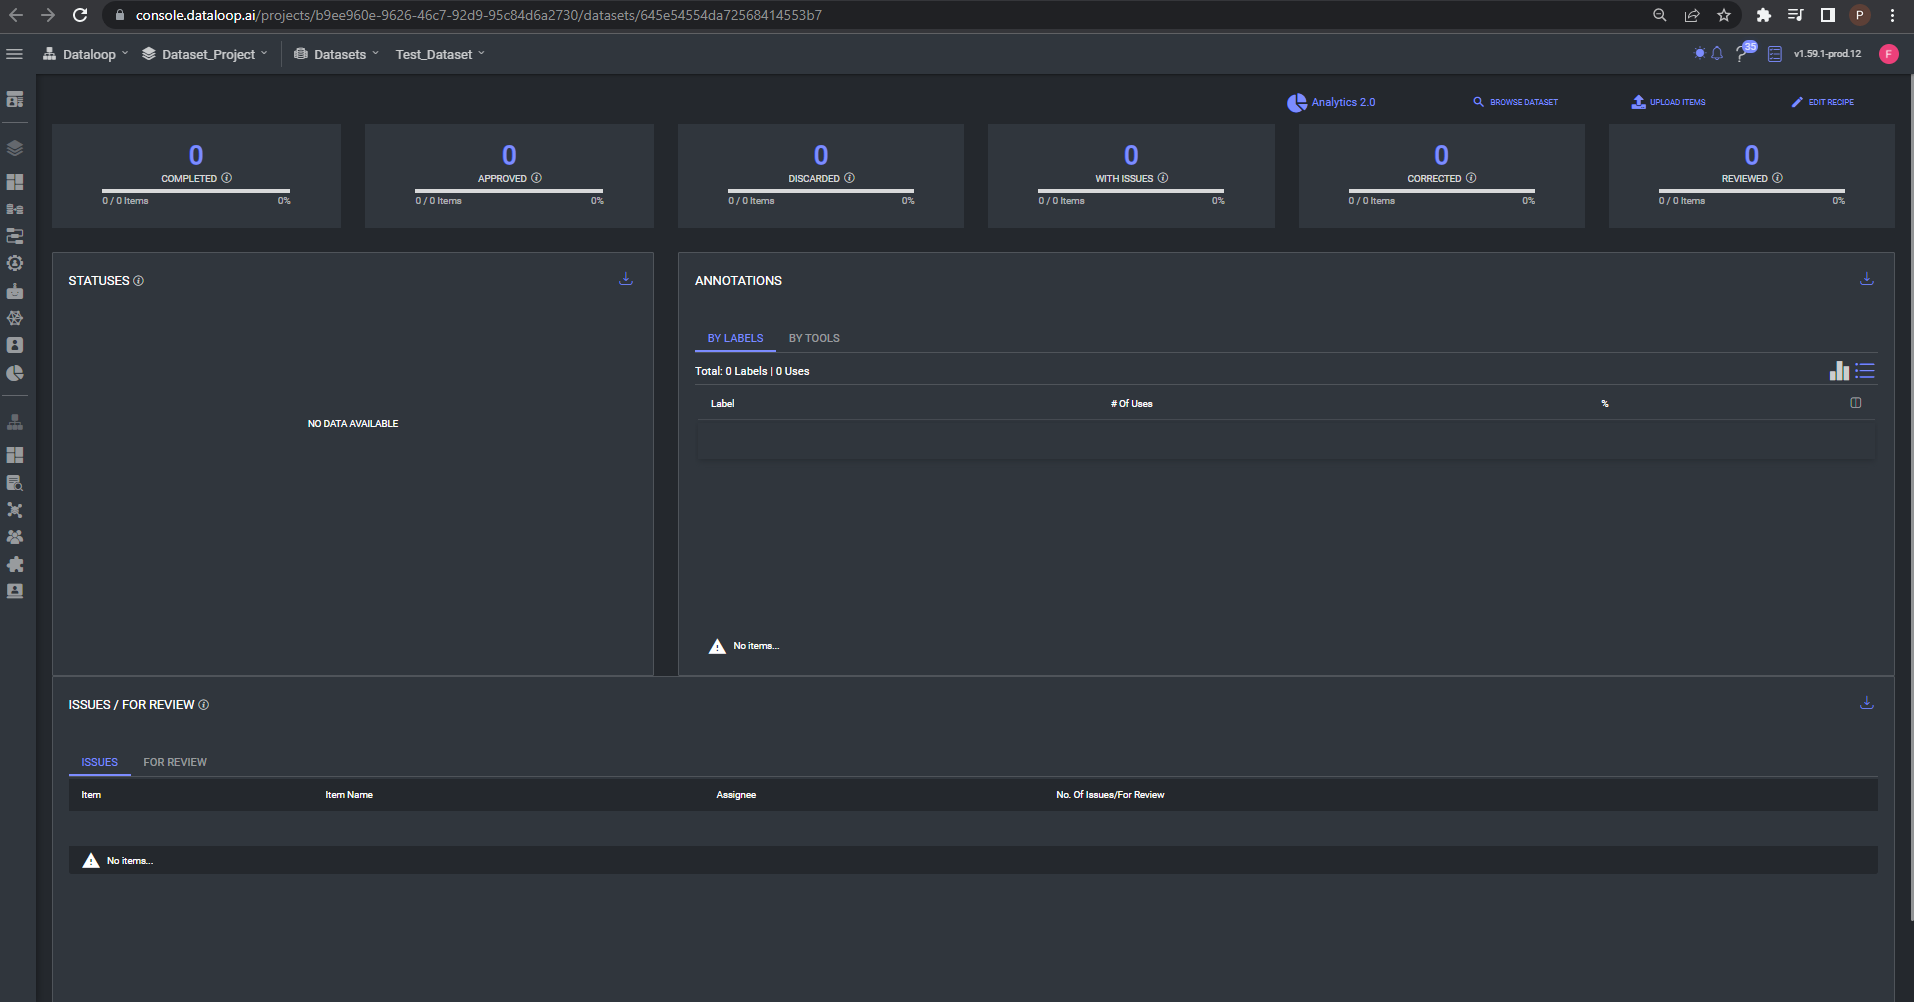

In [34]:
dl.datasets.open_in_web(dataset_name='Test_Dataset')


In [31]:
dl.datasets.open_in_web(dataset_name='Test_Dataset')#or proj. (project variable/object)

In [33]:
proj.datasets.open_in_web(dataset_id='6463bc5eb0a8f67d41b9b39e')

asd

Project(created_at=1683805649832, creator='myfuncont@gmail.com', id='b9ee960e-9626-46c7-92d9-95c84d6a2730', name='Dataset_Project', feature_constraints=[{'name': 'downloadJsons', 'quota': 1, 'title': 'Download Annotation as Json'}, {'name': 'createGPUService', 'quota': 1, 'title': 'Create GPU service'}, {'name': 'createIntegration', 'quota': 1, 'title': 'Create Integrations'}, {'name': 'createDriver', 'quota': 1, 'title': 'Create Driver'}])

# <a name="set_readonly"></a> dl.datasets.set_readonly()

The `dl.datasets.set_readonly()` method allows you to make the Dataset Read-Only, which means that only the users having the Owner role can modify it after they deactivate the Read-Only mode.

You can see the details of this method, below.

## set_readonly()

**Definition:** `set_readonly(state: bool, dataset: entities.Dataset)`

***Set Dataset's Read-Only mode.***

**Prerequisites:** You must be in the role of an Owner.

**param bool state**
- state to update readonly mode

**param dtlpy.entities.dataset.Dataset dataset**
- dataset object

**Example:**
```python
project.datasets.set_readonly(dataset='dataset_entity', state=True)
```
Below, you will see an example of this method being implemented for the `Test_Dataset` Dataset object we created:
```python
# d_set is the dataset object/variable we created using:
# d_set = dl.datasets.create(dataset_name=`Test_Dataset`)
d_set = dl.datasets.get(dataset_name='Test_Dataset') 
dl.datasets.set_readonly(dataset=d_set, state=True)
```
This will set the Dataset as Read-Only, which means that no modifications can be done to the Items, Recipes, Ontologies, Annotations, etc. inside of it. To prove that, we will create a new Label called "Dog" and then try to delete it. First, we create the new Label:
```python
d_set.add_label(label_name="Dog") #Adds a new label called Dog
d_set.labels #used to list all labels from the dataset
```
By running the code above, you should get this output and all other Labels you have inside of the Dataset:
```python
[Label(tag='Dog', display_data={}, color='#01d1c0', display_label='Dog', attributes=[], children=[])]
```
Now we will try deleting the Label using this code:
```python
d_set.delete_labels(label_names='Dog')
```
Now, if we try to list the Lables in the Dataset, we will see that the "Dog" Label is still present:
```python
d_set.labels
```
Output:
```python
[Label(tag='Dog', display_data={}, color='#01d1c0', display_label='Dog', attributes=[], children=[])]
```

To deactivate the Read-Only mode of the Dataset, use the code below:
```python
dl.datasets.set_readonly(dataset=d_set, state=False)
```

In [42]:
d_set = dl.datasets.get(dataset_name='Test_Dataset')
dl.datasets.set_readonly(dataset=d_set, state=True)

[2023-05-16 22:11:13][WAR][dtlpy:v1.76.17][repositories.datasets:951] Dataset is already "readonly=True". Nothing was done


In [49]:
d_set.delete_labels(label_names='Dog')

In [50]:
d_set.labels

[Label(tag='Dog', display_data={}, color='#01d1c0', display_label='Dog', attributes=[], children=[])]

In [51]:
dl.datasets.set_readonly(dataset=d_set, state=False)

In [54]:
d_set.delete_labels(label_names='Dog')

In [55]:
d_set.labels

[Label(tag='Dog', display_data={}, color='#01d1c0', display_label='Dog', attributes=[], children=[])]

# <a name="update"></a> dl.datasets.update()

The `dl.datasets.update()` method allows you to update the Dataset with the latest changes.

You can see all the details of this method below.

## update
**Definition:** `update(dataset: entities.Dataset, system_metadata: bool=False, patch: dict=None) -> entities.Dataset`

***Update dataset field.***

**Prerequisites:** You must be an Owner or Developer (engineer) to use this method.

**param dtlpy.entities.dataset.Dataset dataset**
- Dataset object

**param bool system_metadata**
- True, if you want to change metadata system

**param dict patch**
- Specific patch request

**return**
- Dataset object

**rtype**
- dtlpy.entities.dataset.Dataset

**Example:**
```python
dataset = project.datasets.update(dataset_entity)
```

You can see working code below, on our example Dataset:
```python
d_set = dl.datasets.update(d_set) # or proj.datasets.update(d_set)
```
The output of this method is a Dataset Object. That output looks like this:
```python
Dataset(id='645e54554da72568414553b7', url='https://gate.dataloop.ai/api/v1/datasets/645e54554da72568414553b7', name='Test_Dataset', creator='email@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-12T14:59:33.939Z')
```

In [57]:
d_set = dl.datasets.update(d_set) # or proj.datasets.update(d_set)

In [58]:
dl.datasets.update(d_set)

Dataset(id='645e54554da72568414553b7', url='https://gate.dataloop.ai/api/v1/datasets/645e54554da72568414553b7', name='Test_Dataset', creator='myfuncont@gmail.com', items_count=0, expiration_options=None, index_driver='v1', created_at='2023-05-12T14:59:33.939Z')

# <a name="upload_annotations"></a> dl.datasets.upload_annotations()

The `dl.datasets.upload_annotations()` method allows you to upload Annotations to the Dataloop Platform. Above, we showed [how to download Annotations](#download_annotations). Once downloaded, you can also upload them back to the Dataloop platform, even to another Dataset.

You can see all the details about this method, below.

## upload_annotations()
**Definition:** `upload_annotations(dataset, local_path, filters: entities.Filters=None, clean=False, remote_root_path='/', export_version=entities.ExportVersion.V1)`

**Upload Annotations to a Dataset in the Dataloop platform.**

*Example for remote_root_path - if the Item filepath is a/b/item and remote_root_path is /a the start folder will be b instead of a.*

**Prerequisites:** *You must have a Dataset with Items that are related to the Annotations. The relationship between the dataset and annotations is shown in the name. You must be in the role of an Owner or Developer (engineer).*

**param dtlpy.entities.dataset.Dataset dataset**
- Dataset to upload to

**param str local_path**
- str - local folder where the Annotations files are

**param dtlpy.entities.filters.Filters filters**
- Filters entity or a dictionary containing filters parameters

**param bool clean**
- True to remove the old annotations

**param str remote_root_path**
- the remote root path to match remote and local items

**param str export_version**
- exported items will have original extension in filename, V1 - no original extension in filenames

**Example:**
```python
project.datasets.upload_annotations(dataset='dataset_entity',
                                     local_path='local_path',
                                     clean=False,
                                     export_version=dl.ExportVersion.V1
                                     )
```
The code, customised to our dataset `d_set` looks like this:
```python
dl.datasets.upload_annotations(d_set,
                                local_path='local_path',
                                clean=False,
                                export_version=dl.ExportVersion.V1
                                )
```
The output you get after running this method is 2 progress bars - Upload Annotations and Iterate Entity; once they are finished, the annotations should be uploaded to the Dataset. If no Annotation was uploaded (if the path you provided has no Annotations in it), you will get a *warning* looking like this:
```python
[2023-05-16 22:55:48][WAR][dtlpy:v1.76.17][repositories.datasets:926] No annotations uploaded to dataset!
```

In [59]:
dl.datasets.upload_annotations(d_set,
                                local_path='local_path',
                                clean=False,
                                export_version=dl.ExportVersion.V1
                                )

Upload Annotations: 0it [00:00, ?it/s]
Iterate Entity: 0it [00:00, ?it/s]

[2023-05-16 22:55:48][WAR][dtlpy:v1.76.17][repositories.datasets:926] No annotations uploaded to dataset! 



Upload Annotations: 0it [00:00, ?it/s]


## Final Words

Dataloop has a lot of resources that can help you learn about the services we offer. However, it may be challenging to have a comprehensive understanding of the location of all resources or to locate something particular that you need. That's why we took care of organising all of them. 

Below, you will find links to a **mindmap** showing all of the resources available - each element is clickable and will redirect you to that resource. You will also find other Documentation pages and their descriptions, so you know where to look, and what you'll find.

1. [Dataloop's Developer Mindmap](https://gitmind.com/app/docs/m7u63dss) - a visual representation of all the resources available for developers.
2. [Dataloop's Developer Documentation on Redocly](https://developers.dataloop.ai/tutorials/tutorials/) - here you will find a [Beginner Onboarding](https://developers.dataloop.ai/onboarding/onboarding/) which will walk you throught the basics of using Dataloop's platform from the Python SDK, and also an [Advanced Onboarding Exercise](https://developers.dataloop.ai/onboarding/11_onboarding_exercise/) which will show you how to use the platform on a more complicated usecase; [you can also find them on GitHub](https://github.com/dataloop-ai/dtlpy-documentation), if that's your thing.
3. [Dataloop's Main GitHub Repository](https://github.com/dataloop-ai) - this repository contains the main dtlpy package, along with its documentation and other resources; this is meant to be a "clean" space containing the critical elements of Dataloop.
4. [Dataloop's Developer GitHub Repository](https://github.com/dataloop-ai-apps) - this repository contains resources, exercises, examples, documentations, etc. - it's  a Developer Community, which offers resources  from which developers can learn about the platform, ask questions, and find useful code and guides that will solve their problems. 
5. [Dataloop's API Documentation](https://github.com/dataloop-ai-apps/dataloop-api-documentation) - this documentation is a beginner's guide to how to use Dataloop's Rest APIAPI ([click here to open the Swagger UI API page](https://gate.dataloop.ai/api/v1/docs/#/)); it will walk you through what API's are in general, what Dataloop's API is, how it helps you, why you should use it and teaches you **how** to use it. You can also [find a "Glossary" of all API commands here](https://github.com/dataloop-ai-apps/dataloop-api-documentation/blob/main/02_swagger_ui_api_guide.md).
6. [Dataloop's WebUI Version](https://console.dataloop.ai/welcome) - remember that you can always use (and should use) the WebUI version of Dataloop; some things are easier to do on the WebUI version, while others are easier to do in the PythonSDK version - so be sure to use both.

Finally, if you have any troubles in your journey to learn and use Dataloop, you can always contact us for help by clicking the small e-mail button located at the bottom right of the [main Dataloop web page](https://dataloop.ai/), or even [book a demo so we can walk you through how to use Dataloop](https://dataloop.ai/#talkToAnExpert).
